#### Welcome to the example notebook!

This notebook runs through approximately what the data looks like when run successfully. Needed .py documents:

$$ReadCSV.py$$
$$calculate\_pvalues.py$$
$$correlation\_matrix.py$$
$$logistic\_regression.py$$

# <center>  Predicting Graduation Time at Michigan State University with Logistic Regression </center>

<center>Alyssa C. Waterson</center>

<img src="https://64.media.tumblr.com/23e164d141a63d391018d8ca51fb054e/17a0f26e4bf75ae5-95/s500x750/477773184fa2cb65d0bc67b6b480f92bb201c8f6.png" width="40%">

<center> Fig. 1: Students can come into MSU with AP courses from highschool (blue), college level courses from other institutions (orange), neither (green), or both (overlap in blue and orange). For categorization, if they have both types, they are counted in the ‘College level classes’ category. </center>

## Background & Motivation

Deciding to enroll in a university degree program is a complex process;  students apply,  prepare funding,  organize living situations, and prepare to live in a new context altogether. The whole process involved with moving into higher education has sparked interest, as some students have extra weight of responsibility to bear concerning transfer courses. Research efforts with transfer credit holding students and graduation time have only just begun. At Michigan State University (MSU), there have been university-wide conversations about graduation rates and ways of achieving four year graduation  times,  but  research  supported efforts appear to be few and far between. This gives motivation forresearch into transfer courses, especially given that two-year college studies have recently become a large point of interest in STEM.

Specifically, this research is conducted with data collected over several years at MSU. The dataset utilized has a large  collection of demographic information and listing of courses in every students’ repertoire. It also includes courses transferred in from other institutions, college-level or otherwise. Our discussion centers around time-to-degree, or the time that it takes a student to graduate from MSU using number of semesters as the measure.

#### Research Question:

For this project, we are working from pre-existing research, which has previously explored the effect of transfer courses on time-to-degree, doubly focusing on this effect within physics majors. In the work presented here, the 'effect' is now given a platform through Logistic Regression;

RQ: Given features provided by the dataset, what is the predictive power of these features on whether a student graduates before or after a certain number of semesters?

This question gives us flexibility in which method to approach to answer it; which tests we choose, therefore, are dependent on the assumptions we can make with the data available to us.

## Methodology

The dataset has a variety of demographic information listed for each student. This information includes gender, ethnicity, major, high school academic reports, and additional factors organized in pre-made tables. The time frame we consider is from 1992-2013, a near-twenty year time span, despite the dataset going back much farther and being updated to more recent years.  MSU’s transition from quarters to semesters in 1992 motivated this decision.

#### Transfer course type

The types of transfer courses that a student can hold is crucial to understanding the effects on time-to-degree. There are different types of experiences and impacts from those transfer course experiences that shape a student’s post-high schoolcareer.  We distinguish three different types for the purposes of this work (Fig. 1):
- A student has transfer courses, but only from their high school (blue)
- A student has transfer courses and at least one is from a college institution (orange)
- A  student has no transfer courses in their repertoire (green)

In distinguishing these types, two major deciding factors were: (1) the number of students per category relative to each other and (2) what experiences each type has distinctly from  each  other. For the first reason, we define Advanced Placement (AP)  courses as the only high school contributing courses, leaving the remainder of transfer courses as from some college-level institution(s). By the definition of the list above, the students are binned with AP level transfer courses in their own category so long as they do not also hold at least one course from another college-level institution aside from MSU. Subsequently, the number of students tends to be larger for those with at least one college-level course. For the second reason, we defined holding transfer courses both from AP and college-level courses as its own category. It is important to consider that a student having transfer courses from another college means that a student went through applying to/attending a different institution, then transferred that credit to MSU in a sort of translating game – what courses at that institution count for certain degree-required courses at MSU? – and this experience was a critical factor in determining the categories of analysis.

#### Preliminary data manipulation

The dataset utilized in this project has been compiled from years and years of student history at MSU. It is also imperfect, having much missing data (especially for high school related features) and also being formatted in a way that is someone non-numerical. That is, in order to eventually use logistic regression, we would like to one-hot-encode our columns that are not already numerical data and that we consider to be 'features' that could impact time-to-degree. Below is a list of all considered features for this dataset, of which one-hot-encoded features are labeled with an asterisk (\*):

- Gender\*
- Ethnicity\*
- Major\*
- Transfer course type
- High school GPA
- Math placement score
- Time-to-degree\*

Gender and Ethnicity are both one-hot-encoded completely such that all available responses are given unique columns in our dataset. Major is separated by STEM and Non-STEM majors rather than allowing a column for each separate major. Transfer course type is one-hot-encoded upon initial dataset creation. High school GPA and Math placement score are both continuous data, of which Math placement score is the score from a test taken by some students upon arrival at MSU, depending on previous experience in mathematics. Time-to-degree is translated into a binary code by a metric of what semester we are attempting to predict students graduate at or before; i.e., if we would like to choose 10 semesters as the limit (4 years of standard semesters plus two extra semesters), then a student receives a 1 if they graduated at or before 10 semesters and a 0 if they did not.

Let's upload the 'complete' dataframe, as well as our libraries. For uploading, we use the $ReadCSV.py$ file.

In [1]:
import pandas as pd
import unittest
import calculate_pvalues as cpv
import correlation_matrix as cm
import ReadCSV as read #Here!
import csv
import logistic_regression as lr

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, cohen_kappa_score

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Dataset

We will first be using the $ReadCSV$ library to simply read in our .csv file of choice. The one I am using is called '$testdf.csv$'. It uses a code that takes the name of a .csv file and reads it into a $pandas$ dataframe for you.

In [4]:
read.ReadCSV('testdf.csv')

,math_placement_score,hsgpa,NonTC,Mix,APOnly,STEM,NONSTEM,Female,Male,Caucasian,...,Multirace,Hispanic,AsiPac,Asian,Native,HawaiiPac,Other,8 or less,10 or less,12 or less
0,0.053547,-2.386160,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,1
1,-0.484157,-0.121071,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.770486,0.493146,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.201096,0.088851,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
4,1.487425,-0.502042,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,1
5,0.591251,-0.131438,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
6,-1.380331,0.995923,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,1
7,-0.663392,1.065897,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,1
8,2.383599,1.358752,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,1,1
9,-0.304922,-0.281753,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


All of our features are present. We have tagged in three columns at the end: 8 or less, 10 or less, and 12 or less. For the sake of our future analysis in this project, we will only be using the 10 semester metric as the feature we are attempting to predict.

In [5]:
exampledata = read.ReadCSV('testdf.csv')

'testdf.csv' is now called 'exampledata', which we will use for the remainder of the methodology.

#### P-Values

In the first step of analysis, we consider what type of test we would like to run on our data. The first step is to compare each feature against the remaining features for the sake of possibly paring down the dataset; if we have features that are extremely similar to each other statistically, then we can use the Null Hypothesis of that statistical test to presume that we can remove one of the features to avoid 'double counting'. In essence, we want features that are unique from each other and are presumed to have a large effect on time-to-degree.

For the P-Values portion, we choose the Pearson correlation coefficient & extract p-values from the results. P-values are used in many analyses for the purpose of 'confidence' in difference; if two values are statistically different according to the test's statistic, then the p-value tells us by what percent we should be confident in the rejection of the Null Hypothesis.

Let's take a look at the resulting p-values of our dataframe, of which we use $calculate\_pvalues.py$ as our stub function, which takes into account all of the above concepts and codes it through.

In [6]:
cpv.calculate_pvalues(exampledata)

,math_placement_score,hsgpa,NonTC,Mix,APOnly,STEM,NONSTEM,Female,Male,Caucasian,...,Multirace,Hispanic,AsiPac,Asian,Native,HawaiiPac,Other,8 or less,10 or less,12 or less
math_placement_score,0,0,0,0,0,0,0,0,0,0,...,0.9243,0.0001,0,0.0003,0.1666,0.7864,0.0093,0.1455,0,0
hsgpa,0,0,0,0,0,0,0,0,0,0,...,0.9309,0.0021,0.0697,0.152,0.0117,0.1481,0.0521,0.6984,0,0
NonTC,0,0,0,0,0,0.1152,0.1152,0,0,0.2472,...,0.453,0.567,0.3081,0.7428,0.7162,0.4182,0.0842,0,0,0
Mix,0,0,0,0,0,0.0366,0.0366,0,0,0.0717,...,0.3342,0.8243,0.4434,0.7904,0.2533,0.2695,0.1944,0,0,0.0001
APOnly,0,0,0,0,0,0,0,0.6156,0.6156,0,...,0.7528,0.2786,0.7453,0.4166,0.2785,0.6704,0.5811,0.3448,0,0
STEM,0,0,0.1152,0.0366,0,0,0,0,0,0.0675,...,0.5402,0.0526,0.2712,0.0038,0.1136,0.1193,0.4926,0.0402,0.0015,0
NONSTEM,0,0,0.1152,0.0366,0,0,0,0,0,0.0675,...,0.5402,0.0526,0.2712,0.0038,0.1136,0.1193,0.4926,0.0402,0.0015,0
Female,0,0,0,0,0.6156,0,0,0,0,0.619,...,0.9363,0.8966,0.4369,0.5607,0.9784,0.3997,0.6293,0.4637,0.0017,0
Male,0,0,0,0,0.6156,0,0,0,0,0.619,...,0.9363,0.8966,0.4369,0.5607,0.9784,0.3997,0.6293,0.4637,0.0017,0
Caucasian,0,0,0.2472,0.0717,0,0.0675,0.0675,0.619,0.619,0,...,0,0,0,0,0,0.0199,0,0,0,0


#### Correlation matrix

With the Pearson correlation test in mind, we do not only want the p-values. We can also visually represent the comparisons of correlation between all of the tests run as a grid, or in a 'correlation matrix'. Pearson's correlation coefficient is a value between -1 and 1, of which 1 means that the two data are highly correlated and -1 means that the two data are highly anti-correlated. We wish to visualize these correlations with the intent of, in future aspects of this project, eliminating features that may be too similar to each other.

In order to represent the matrix, we use the $correlation\_matrix.py$ file.

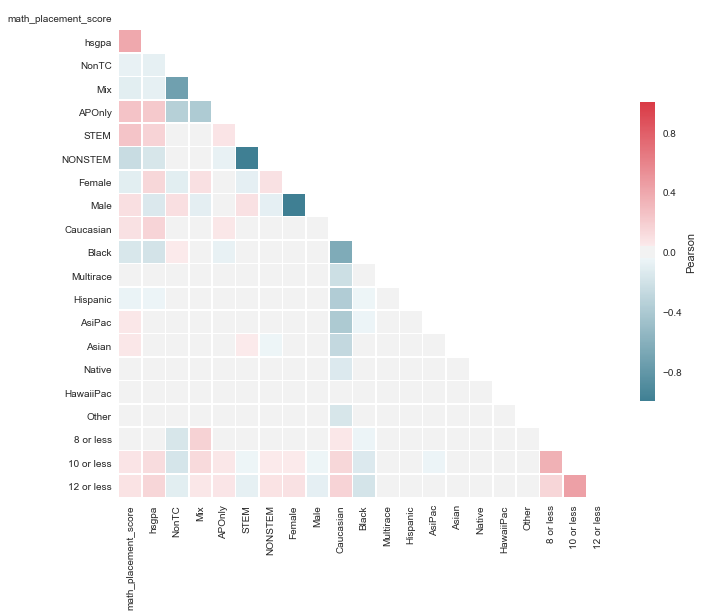

In [7]:
cm.correlation_matrix(exampledata)

<center> Fig. 2: Correlation matrix shown. The Pearson statistic is mapped to a blue-to-red spectrum, blue being highly anti-correlated (-1) and red being highly correlated (1). Notable feature name changes are NonTC (students with no transfer courses), Mix (students with at least one college level transfer course) and APOnly (students with only transfer courses from AP level courses). </center>

The correlation matrix uses $scipy.stats$ for its 'pearsonr' method of comparison. As explained above, our features are filtered through and compared one-by-one against each other for similarity. The $correlation\_matrix.py$ file has the additional capability of annotating each square with the individual scores from the Pearson test, but this looks quite messy when all values are displayed on the visual.

#### Logistic regression

In the final segment of the analysis, we return to the Research Question: Given features provided by the dataset, what is the predictive power of these features on whether a student graduates before or after a certain number of semesters? 'Predictive power' implies some sort of 'prediction' occurring; in many Machine Learning-based practices, the intent of a project is to make a prediction about an outcome from a set of features that are assumed to effect the outcome. Common examples are recognition softwares, e.g. a script that attempts to identify a giraffe based on the presence of yellow, spots, and long necks. In this project, we wish to predict the outcome of graduation at or before 10 semesters with all of our chosen features as predictors.

The $logistic\_regression.py$ file uses $sklearn$ modules: $train\_test\_split$, $LogisticRegression$, $SGDClassifier$, and the $roc\_curve$, $roc\_auc\_score$, $accuracy\_score$, $cohen\_kappa\_score$ modules for production of the model and scores. The data goes through training/testing/splitting for the prediction, such that the model takes a small piece of itself and attempts a prediction (training), then tests that prediction against the model. The Logistic Regression is the outcome of that effort. The remainder of the tools are used for production of the Accuracy score and the Cohen's Kappa score, which are both used as extraneous verification factors for validity of the model. Below are the results of the regression.

Acc score: 0.59
Cohen's Kappa: 0.19


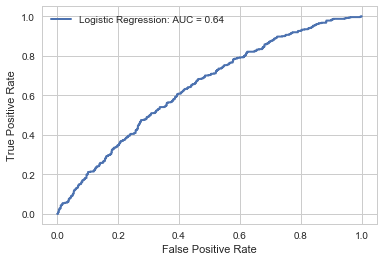

In [8]:
lr.logistic_regression(exampledata)

<center> Fig. 3: Logistic regression AUC curve. The curve itself will be more pronounced if there is a higher correlation and if it looks more linear, there is a lower correlation. Ideal scores are closer to 1.  </center>

The Accuracy score reports how many predictions the model should have gotten right. That is, the number of correct predictions. The Cohen's Kappa score is an inter-rater reliability score, giving a comparison to determine whether two observations agree. The Kappa score gains more veritability as two observations agree more, and so we wish to see a higher (closer to 1) Kappa score.

The AUC score, or the Area Under Curve score takes the area under the logistic regression curve. This represents the probability that our model correctly classifies a student's graduation semester status. The closer this score is to 1, the more likely it is that our model will correctly classify the student.

## Results

#### P-Values

The p-values provided in the table above show comparison confidence for each individual comparison between features. In many statistical analyses, it is good to see p-values below 5% and especially good to see p-values below 1%. The table has a large range of values between 0 and 100%. Many of the values come out to be 0, which does not always imply a 'best case scenario' (in the attempt of having as low a p-value as possible). Some p-values in the table come out much greater than 5%. This gives us a wide array of results, meaning there are several comparisons we will have 'low' confidence in.

#### Correlation matrix

With the Pearson correlation (Fig. 2), we see that a few of our comparisons are a bit correlated, including: high school GPA and math placement score, 'APOnly' and math placement score, 'STEM' and math placement score, among other comparisons. It seems that math placement score could be correlated with many of our other features! Among anti-correlated features, there are two obvious ones: Male and Female, and STEM and Non-STEM. Since each of these are created through one-hot-encoding with only two available options to encode, these columns of data should be completely anti-correlated to each other. Besides that, there are a couple of anti-correlations, including 'Mix' and 'NonTC', and 'Black' and 'Caucasian'.

#### Logistic Regression

Through all of our features, we picked '10 or less' to be the feature we are attempting to predict (Fig. 3); the accuracy score ends up a value of 0.59, with the Cohen's Kappa score at 0.18 and the AUC score of the actual regression curve to be 0.64.

Each score individually is quite poor within the standards of their own tests. ~60% accuracy implies that 40% of our data is incorrectly classified. The Cohen's Kappa score is in the 'None-to-slight' agreement category, meaning our model's testing and training may not be communicating with each other well enough to imply causation. The AUC score is lower than our standard of predictability, of which our personal lowest standard is around 75%.

## Discussion

In all, the results are not so grand. It is quite poor of a result to have such high p-values in any comparison, as well as to have multiple instances of high p-values. The example data is actually only 5000 rows worth of the original data, which is tens of thousands of rows (meaning tens of thousands of students). For the sake of anonymity, this project example simply takes as little data as possible and runs the tests accordingly; this means, for this specific analysis, we may be seeing skewed results in all aspects due to "missing data". That is, we may be mis-representing the whole data by picking and choosing pieces of the whole. 

#### Data setbacks

The Data is already flawed from conception; upon narrowing down the data, we have several missing values in the high school GPA and math placement score columns. We hypothesize that the missing data in these specific rows can come from a litany of places, including students who attend internationally (hard to receive high school data), students who transfer in several credits of courses (more likely to be exempt from the math placement exam), etc. Additionally, creating individual columns for each ethnicity may be drawing some error considering the number of students in each category; in the full dataset, there are only 28 Hawaii-Pacific students in total, meaning when we rip the 5000 rows for our example dataset here, we may be grabbing very few of those students at all.

#### Impacts

There are several note-worthy aspects to this analysis, but the main focus is on the potential impacts of these aspects. Prediction may not have come out to be as powerful as anticipated, but this could mean that the features chosen are not quite as impactful to time-to-degree as suspected, or there are certain factors that could be eliminated or honed down to increase the predictive power of the model. We also chose 10 semesters as the limiter to discern a '4 year degree' (8 semesters plus 2 semesters extra for considering potential summer courses), but there also could be better representations for the limit, like 8 or 12 semesters. This brings up the general inquiry of what it means to graduate 'on time'. What suffices as a 4 year degree in terms of semesters? This question is especially important considering that a substantial amount of scholarships and financial aid opportunities rest on 8 semester metrics, as in 4 years, with Fall and Spring semesters per year covered. If several students take more than 8 semesters to graduate, however, what does this mean for the metric we choose in our analysis?

We also see interesting points in the correlation matrix in particular, showing that high school GPA and math placement score are correlated with each other. This is interesting from the perspective that this could insinuate that high school GPA and math placement score hold some credence with respect to each other, but we always must be careful in data science not to draw conclusions from only numerical values. Correlation can mean many things, but it mostly draws interest in the limit that we set in this project on how high of a correlation value could mean dropping one of the features from consideration. Are high school GPA and math placement score highly correlated enough to justify eliminating one?

#### Obstacles & Future work

This project will continue to be analyzed for ways to increase the AUC score & therefore more closely predict time-to-degree on the binary scale. We will consider more heavily the average semesters-to-graduate for more considerable time-to-degree binary representation. As well, we will see how adding or removing features (or even limiting existing features, like ethnicity) can change the logistic regression score.

There were many obstacles in this project, including parsing the data from the full dataset to the example dataset used here. The missing data was a difficult piece to tackle conceptually, considering we were not sure why so many values were missing, but in the future we will be discussing data imputation and how this may impact our results. Data imputation is when missing data is substituted by class averages, the mean/median value of the column, or other methods. In this project specifically, there was a lot of issue with the unit test and ensuring that the dataset starts off with no non-numeric columns. 